In [2]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import requests

from config import weather_api_key

# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.

# Define variable for latitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

# Define variable for longitudes
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack both vairables together with the zip() function into memory
lat_lngs = zip(lats, lngs)

lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
                      
# Print the city count to confirm sufficient count.

len(cities)

597

In [7]:
#Build basic url for the openweathermap

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
      
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")
 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tupik
Processing Record 2 of Set 1 | kolokani
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | krasnyy luch
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | road town
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | lincoln
Processing Record 11 of Set 1 | krasnoselkup
Processing Record 12 of Set 1 | syracuse
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | strezhevoy
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | toliary
City not found. Skipping...
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | porto novo
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 o

Processing Record 37 of Set 4 | the valley
Processing Record 38 of Set 4 | salinopolis
Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | huntington beach
Processing Record 41 of Set 4 | ayan
Processing Record 42 of Set 4 | miles city
Processing Record 43 of Set 4 | maumere
Processing Record 44 of Set 4 | korla
Processing Record 45 of Set 4 | emba
Processing Record 46 of Set 4 | buta
Processing Record 47 of Set 4 | nabire
Processing Record 48 of Set 4 | fairbanks
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | burayevo
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | syamzha
Processing Record 4 of Set 5 | otjimbingwe
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | magadan
Processing Record 7 of Set 5 | leh
Processing Record 8 of Set 5 | whitehorse
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of Set 5 | fonte boa
Processing Reco

Processing Record 26 of Set 8 | ekhabi
Processing Record 27 of Set 8 | falealupo
City not found. Skipping...
Processing Record 28 of Set 8 | perrysburg
Processing Record 29 of Set 8 | hervey bay
Processing Record 30 of Set 8 | acapulco
Processing Record 31 of Set 8 | marystown
Processing Record 32 of Set 8 | kurunegala
Processing Record 33 of Set 8 | kpandae
Processing Record 34 of Set 8 | xining
Processing Record 35 of Set 8 | mabaruma
Processing Record 36 of Set 8 | vardo
Processing Record 37 of Set 8 | kirensk
Processing Record 38 of Set 8 | marrakesh
Processing Record 39 of Set 8 | mulchen
Processing Record 40 of Set 8 | kavieng
Processing Record 41 of Set 8 | zhigansk
Processing Record 42 of Set 8 | bousso
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | komsomolskiy
Processing Record 45 of Set 8 | colorado
Processing Record 46 of Set 8 | isiro
Processing Record 47 of Set 8 | ballina
Processing Record 48 of Set 8 | ullapool
Processing Record 49 of Set 8 | po

Processing Record 14 of Set 12 | melilla
Processing Record 15 of Set 12 | north bend
Processing Record 16 of Set 12 | peace river
Processing Record 17 of Set 12 | aracati
Processing Record 18 of Set 12 | podgorica
Processing Record 19 of Set 12 | poum
Processing Record 20 of Set 12 | sergeyevka
Processing Record 21 of Set 12 | ondjiva
Processing Record 22 of Set 12 | klyuchi
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | savannah bight
Processing Record 25 of Set 12 | culaman
Processing Record 26 of Set 12 | ventspils
Processing Record 27 of Set 12 | sao filipe
Processing Record 28 of Set 12 | tautira
Processing Record 29 of Set 12 | te anau
Processing Record 30 of Set 12 | geraldton
Processing Record 31 of Set 12 | sittingbourne
Processing Record 32 of Set 12 | vila velha
Processing Record 33 of Set 12 | guadalupe y calvo
Processing Record 34 of Set 12 | maihar
Processing Record 35 of Set 12 | nanakuli
Processing Record 36 o

In [9]:
len(city_data)

546

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tupik,54.4253,119.9327,18.99,72,3,6.15,RU,2022-11-09 01:51:39
1,Kolokani,13.5728,-8.0339,71.80,18,12,6.46,ML,2022-11-09 01:51:39
2,Nanortalik,60.1432,-45.2371,28.87,71,61,7.85,GL,2022-11-09 01:51:39
3,Krasnyy Luch,48.1395,38.9371,36.86,90,100,2.57,UA,2022-11-09 01:51:40
4,Touros,-5.1989,-35.4608,77.97,80,51,11.18,BR,2022-11-09 01:51:40
5,Hobart,-42.8794,147.3294,80.22,57,20,11.50,AU,2022-11-09 01:45:26
6,Road Town,18.4167,-64.6167,82.49,94,40,8.05,VG,2022-11-09 01:40:55
7,Ushuaia,-54.8000,-68.3000,47.86,53,75,3.44,AR,2022-11-09 01:43:05
8,Lincoln,40.8000,-96.6670,65.17,86,100,17.27,US,2022-11-09 01:50:29
9,Krasnoselkup,65.7000,82.4667,14.59,96,100,8.88,RU,2022-11-09 01:51:41


In [11]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tupik,RU,2022-11-09 01:51:39,54.4253,119.9327,18.99,72,3,6.15
1,Kolokani,ML,2022-11-09 01:51:39,13.5728,-8.0339,71.80,18,12,6.46
2,Nanortalik,GL,2022-11-09 01:51:39,60.1432,-45.2371,28.87,71,61,7.85
3,Krasnyy Luch,UA,2022-11-09 01:51:40,48.1395,38.9371,36.86,90,100,2.57
4,Touros,BR,2022-11-09 01:51:40,-5.1989,-35.4608,77.97,80,51,11.18
5,Hobart,AU,2022-11-09 01:45:26,-42.8794,147.3294,80.22,57,20,11.50
6,Road Town,VG,2022-11-09 01:40:55,18.4167,-64.6167,82.49,94,40,8.05
7,Ushuaia,AR,2022-11-09 01:43:05,-54.8000,-68.3000,47.86,53,75,3.44
8,Lincoln,US,2022-11-09 01:50:29,40.8000,-96.6670,65.17,86,100,17.27
9,Krasnoselkup,RU,2022-11-09 01:51:41,65.7000,82.4667,14.59,96,100,8.88


In [12]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

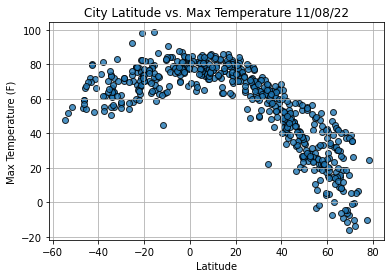

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

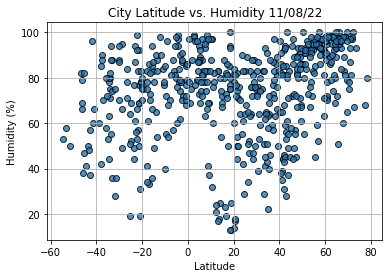

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

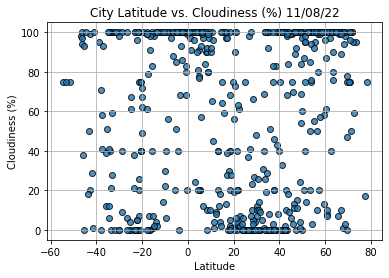

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

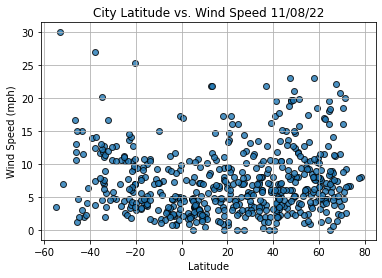

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
   
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [19]:
index13 = city_data_df.loc[13]

index13

City                      Rikitea
Country                        PF
Date          2022-11-09 01:42:58
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    75.78
Humidity                       87
Cloudiness                    100
Wind Speed                  13.56
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
541     True
542    False
543     True
544    False
545     True
Name: Lat, Length: 546, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tupik,RU,2022-11-09 01:51:39,54.4253,119.9327,18.99,72,3,6.15
1,Kolokani,ML,2022-11-09 01:51:39,13.5728,-8.0339,71.80,18,12,6.46
2,Nanortalik,GL,2022-11-09 01:51:39,60.1432,-45.2371,28.87,71,61,7.85
3,Krasnyy Luch,UA,2022-11-09 01:51:40,48.1395,38.9371,36.86,90,100,2.57
6,Road Town,VG,2022-11-09 01:40:55,18.4167,-64.6167,82.49,94,40,8.05
...,...,...,...,...,...,...,...,...,...
539,Douglas,US,2022-11-09 02:01:13,41.3000,-96.1670,61.68,81,100,19.57
540,Yar-Sale,RU,2022-11-09 02:05:40,66.8333,70.8333,11.86,96,99,7.63
541,Qasigiannguit,GL,2022-11-09 02:05:40,68.8193,-51.1922,-11.43,81,3,6.22
543,Seoul,KR,2022-11-09 02:05:38,37.5683,126.9778,53.20,71,0,1.14


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tupik,RU,2022-11-09 01:51:39,54.4253,119.9327,18.99,72,3,6.15
1,Kolokani,ML,2022-11-09 01:51:39,13.5728,-8.0339,71.80,18,12,6.46
2,Nanortalik,GL,2022-11-09 01:51:39,60.1432,-45.2371,28.87,71,61,7.85
3,Krasnyy Luch,UA,2022-11-09 01:51:40,48.1395,38.9371,36.86,90,100,2.57
6,Road Town,VG,2022-11-09 01:40:55,18.4167,-64.6167,82.49,94,40,8.05


In [23]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

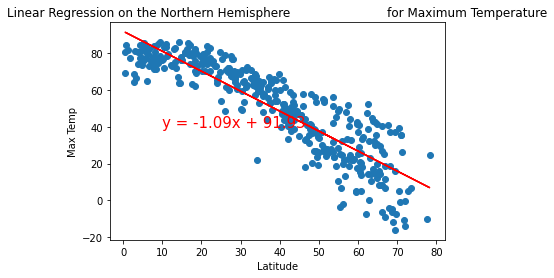

In [24]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

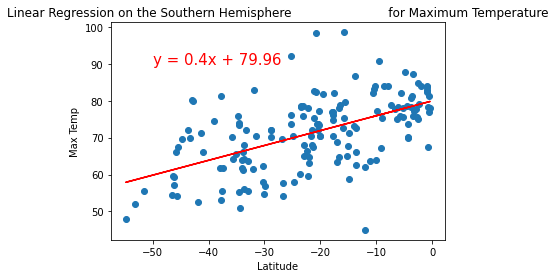

In [25]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

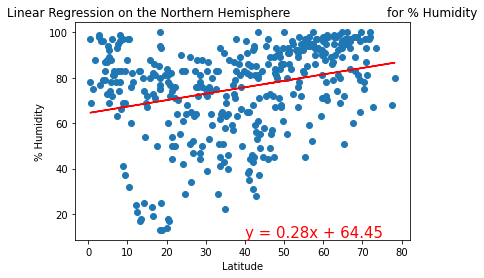

In [26]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

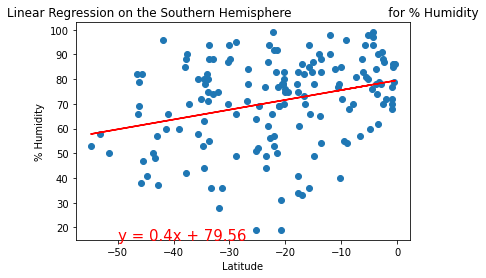

In [27]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

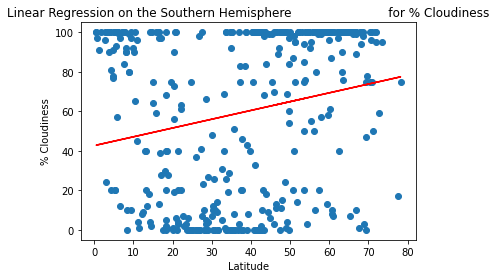

In [30]:
# Skill drill 
    #1. Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
    #2. Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.
    
x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-5,85))

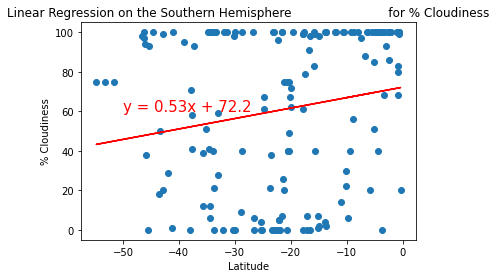

LinregressResult(slope=0.5281522677082959, intercept=72.19884268839272, rvalue=0.1818692366089587, pvalue=0.021353424973955825, stderr=0.2271786096731692, intercept_stderr=5.777880754020899)

In [33]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

linregress(x_values, y_values)

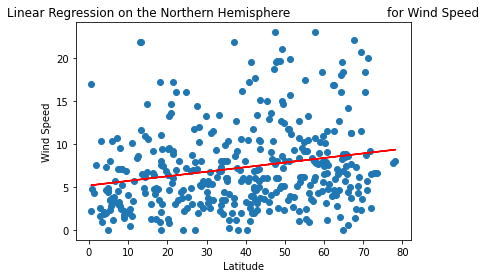

In [34]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

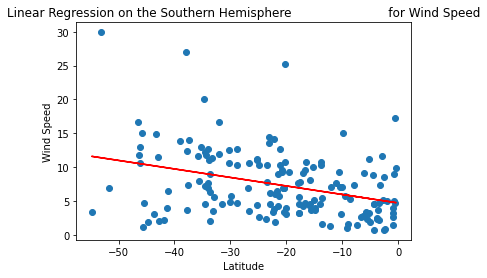

In [35]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))